In [1]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
## Load dataframe
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/OxygenData/gradientFree/'
file='runComparison.csv'
df = pd.read_csv(resultsDir+file, header=0)

# Oxygen Atom DFT-FE 
TotalEnergy = -7.4469337501098821e+01
BandEnergy = -4.0613397710076626e+01 
HartreeEnergy = 36.32506036
ExchangeEnergy = 0.0
CorrelationEnergy = 0.0
KineticEnergy = 0.0

## Fill error arrays

df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
try: 
    df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')
    
df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
try: 
    df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')

'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.


In [3]:
## Plotting functions
def gradientFree(df,A,B,C,save=False):
    

    fig, ax = plt.subplots(figsize=(8,6))
    df = df.sort_values(by=B)
    grouped = df.groupby(C)
#     grouped.sort_values(C, ascending=False)
    for name,group in grouped:
        if name=='True':
            name='Gradient-Free'
        if name=='False':
            name='Gradient'
        group.plot(x=B, y=A, style='o',markerSize=6, ax=ax, logy=True,label='%s'%(name))
    plt.legend() 
    
#     ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    plt.xlabel('Mesh Size')
#     plt.xlabel(r'$\theta$')
#     plt.xlabel('Polynomial Order')
    plt.ylabel('Energy Error (Hartree)') 
    
#     plt.xlim([0.25, 1.0])
#     plt.ylim([3e-10,1e-2])
#     plt.grid()
    
#     df.plot(x='divideParameter3',y='batchSize',logx=True,style='o')
    plt.show()

In [4]:
df;

<IPython.core.display.Javascript object>


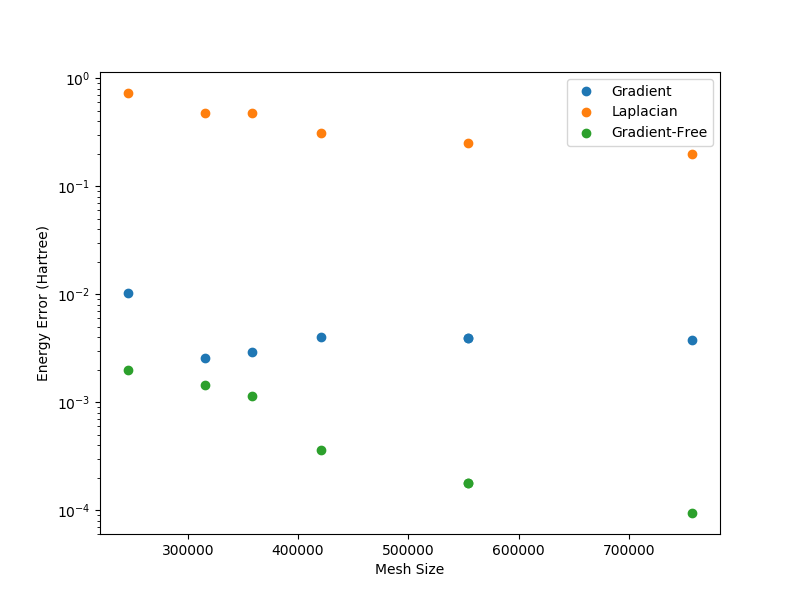

In [5]:
# print(df)
# gradientFree(df,'absTotalEnergyError','divideParameter3','gradientFree')
# gradientFree(df,'absTotalEnergyError','numberOfPoints','gradientFree')
gradientFree(df,'absBandEnergyError','numberOfPoints','gradientFree')
# gradientFree(df,'absHartreeEnergyError','numberOfPoints','gradientFree')

In [114]:
for i in df.loc[df['gradientFree']=='Laplacian'].index:
    print(i)
    print(df.iloc[i],'\n')
    df=df.drop(df.iloc[i])
df

14
domainSize                                                                  20
minDepth                                                                     3
maxDepth                                                                    15
additionalDepthAtAtoms                                                       0
depthAtAtoms                                                                15
order                                                                        5
numberOfCells                                                             2528
numberOfPoints                                                          316000
gradientFree                                                         Laplacian
divideCriterion                                         ParentChildrenIntegral
divideParameter1                                                             0
divideParameter2                                                             0
divideParameter3                                 

KeyError: "[20 2528 316000 'Laplacian' 'ParentChildrenIntegral' 1e-06 -0.5 1e-06\n '[-18.75815809  -0.87166507  -0.33836894  -0.33836894  -0.33836894]'\n -40.6131220704 74.1150891904 -7.219679775 -0.544564868014 36.3271260413\n -74.4709955546 8000 8000 5580.834390163422 1.7103664875030518 821\n 0.00027563967662302957 7.219679775 0.0020656812999959584 0.544564868014\n 0.0016580535011740949 74.1150891904 0.00027563967662302957 -7.219679775\n 0.0020656812999959584 -0.544564868014 -0.0016580535011740949\n 74.1150891904] not found in axis"